In [163]:
from scipy import misc
import imageio
from scipy import ndimage
import numpy as np
import matplotlib.pyplot as plt
import math
import cv2 
from scipy import signal

In [208]:
def get_response(det, tr, k):
  response = det - (k*(tr**2))
  return response

def display(image, title=None):
  if title:
    plt.title(title)
  plt.imshow(image, cmap="Greys_r")
  plt.show()

def get_kernel(dimension, standard_dev):
  kernel = np.linspace(-(dimension//2), dimension//2, dimension)
  index = 0
  while index < dimension:
    kernel[index] = (1 / np.sqrt( 2 * np.pi * (standard_dev * standard_dev) ) ) * np.exp(-( (kernel[index] * kernel[index])/(2*standard_dev*standard_dev) ) ) 
    index = index + 1
  #kernel = np.outer(kernel.T, kernel) 
  # normalize
  kernel = kernel/kernel.max()
  return kernel

def convolve(c, k1, k2):
  c1 = horizontal_convolution(c, k1)
  c2 = vertical_convolution(c1,k2)
  return c2

def horizontal_convolution(image, kernel):
  return vertical_convolution(image.T, kernel).T

def vertical_convolution(image, kernel):
  
  out = np.zeros(image.shape)

  pad = np.zeros((1,image.shape[1]))
  pad_image = np.vstack((pad, image))
  pad_image = np.vstack((pad_image, pad))
  for i in range(len(kernel)//2 -1):
    #print(i)
    pad_image = np.vstack((pad, pad_image))
    pad_image = np.vstack((pad_image, pad))


  # going down a row 
  # fix a column
  for c in range(image.shape[1]):
    # loop thru row
    for r in range(image.shape[0]):
      pixel_val = []
      for k in range(len(kernel)):
        # print(f"c:{c} r:{r} k:{k} pad_image[{r+k}][{c}] {pad_image[r+k][c]}")
        pixel_val.append(pad_image[r+k][c])
      #print('\n')
      pixel_val = np.multiply(pixel_val, kernel)
      
      out[r][c] = np.sum(pixel_val)
  return out

def sobel_(imm):
  gaus = np.array([1,2,1])
  gx = np.array([-1,0,1])
  gy = np.array([1,0,-1])
  grad_y = convolve(imm,gy, gaus)
  grad_x = convolve(imm, gaus, gx)
  return grad_x, grad_y

def get_sum_squares(x,y,struct_tensors,offset):
    start_r = y-offset 
    end_r = 1+y+offset
    start_c = x-offset 
    end_c = 1+x+offset
    return (
        struct_tensors[0][start_r: y+offset+1, start_c:end_c].sum(),
        struct_tensors[1][start_r: y+offset+1, start_c:end_c].sum(),
        struct_tensors[2][start_r: y+offset+1, start_c:end_c].sum()
    )






In [224]:
def haris(image_name="image1.jfif", window=3, threshold=999*99, k=0.04):
  # Step 1
  image = cv2.imread(image_name)
  display(image, "Original Image")
  # Convert image to gray scale
  grey = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
  display(grey, "Grey Scale Image")

  # step 2
  gy,gx = np.gradient(grey)

  display(gx, "Gradient Horizontal")


  display(gy, "Gradient Vertical")
  
  # Step 3 : Structure Tensor Setup

  struc_tensors = (gx**2,gx*gy,gy**2)
  
  # step 5 find corners and edges
  corners = np.copy(image)


  offset = window//2

  rows,cols = grey.shape
  
  # find corners
  for x in range(offset, rows-offset):
    for y in range(offset, cols-offset):
      sum_squares = get_sum_squares(x,y,struc_tensors, offset)


      det = sum_squares[0]*sum_squares[2] - sum_squares[1]*sum_squares[1]
      tr = sum_squares[0] + sum_squares[2]
      tr *= tr 
      res = det - k*tr
      
      try: 
        if res > threshold:
          corners[y,x,1] = 250

      except IndexError:
        pass


  display(corners, "Corners")

  return corners




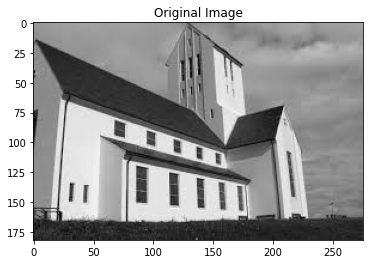

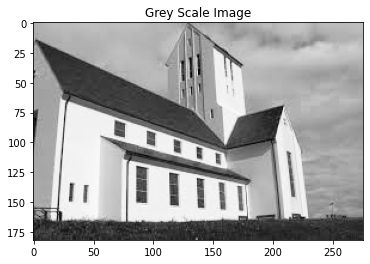

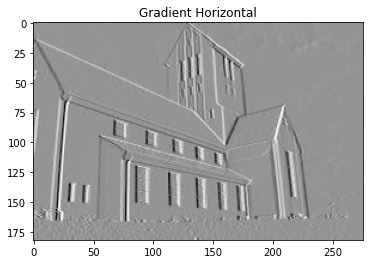

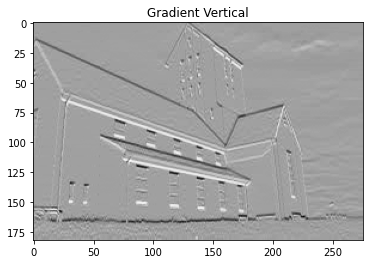

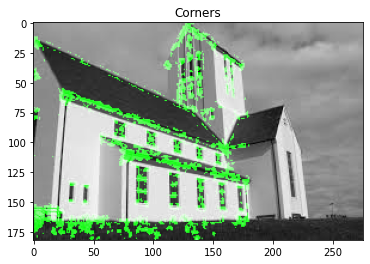

array([[[150, 150, 150],
        [150, 150, 150],
        [150, 150, 150],
        ...,
        [163, 163, 163],
        [163, 163, 163],
        [163, 163, 163]],

       [[149, 149, 149],
        [150, 150, 150],
        [150, 150, 150],
        ...,
        [163, 163, 163],
        [163, 163, 163],
        [163, 163, 163]],

       [[149, 149, 149],
        [149, 149, 149],
        [149, 149, 149],
        ...,
        [162, 162, 162],
        [162, 162, 162],
        [162, 162, 162]],

       ...,

       [[ 41,  41,  41],
        [ 31,  31,  31],
        [ 47,  47,  47],
        ...,
        [ 44,  44,  44],
        [ 47,  47,  47],
        [ 49,  49,  49]],

       [[ 47,  47,  47],
        [ 31,  31,  31],
        [ 35,  35,  35],
        ...,
        [ 32,  32,  32],
        [ 35,  35,  35],
        [ 38,  38,  38]],

       [[ 50,  50,  50],
        [ 36,  36,  36],
        [ 28,  28,  28],
        ...,
        [ 30,  30,  30],
        [ 33,  33,  33],
        [ 36,  36,  36]]

In [225]:
haris()